In [48]:
from Phase_4_functions import roll_mean_std
from Phase_4_functions import decompose
from Phase_4_functions import DickeyFullerTest
from Phase_4_functions import train_test_split
from Phase_4_functions import naive_model
from Phase_4_functions import sarimax_search
from Phase_4_functions import fbprophet_func
from Phase_4_functions import LSTM_func

import pandas as pd
from statsmodels.tsa.stattools import adfuller

ImportError: cannot import name 'train_test_split' from 'Phase_4_functions' (/Users/home/Documents/Coding/Flatiron/Phase_4_Project/Phase_4_Project/Phase_4_functions.py)

In [35]:
df = pd.read_csv('data/new_zillow_data.csv')

In [36]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 
                                  'Metro', 'CountyName', 'RegionType', 'StateName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [37]:
melted = melt_data(df)
melted['time'] = pd.to_datetime(melted['time'])
melted.set_index('time', inplace=True)

## Zip Code 30314 (Atlanta, GA)

In [38]:
Atlanta = melted[melted.RegionName == 30314]
Atlanta = Atlanta.resample('MS').mean()
Atlanta = Atlanta.drop(['RegionName', 'RegionID', 'SizeRank'], axis=1)

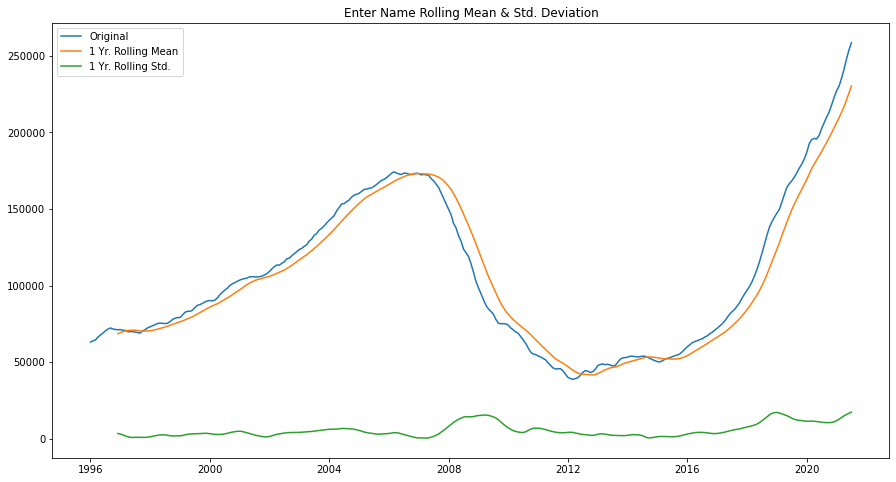

In [39]:
roll_mean_std(Atlanta)

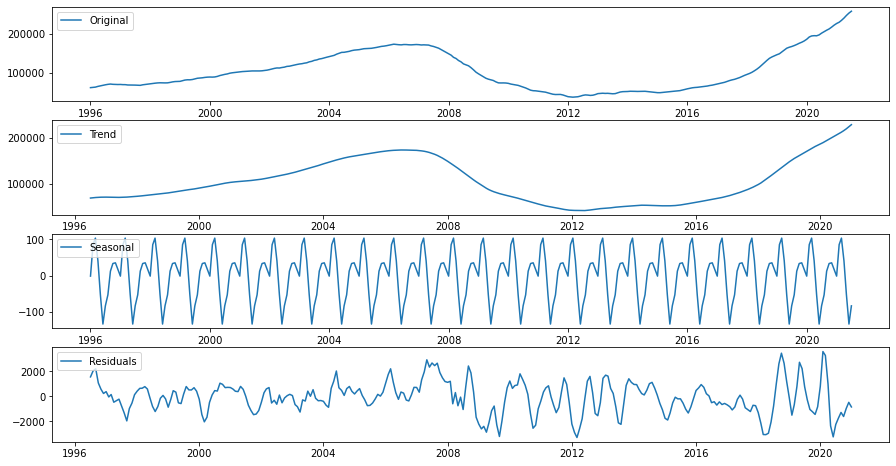

In [40]:
decompose(Atlanta)

In [43]:
DickeyFullerTest(Atlanta)

NameError: name 'pd' is not defined

In [45]:
train_test_split(Atlanta)

NameError: name 'train_test_split' is not defined

In [44]:
naive_model(Atlanta)

TypeError: naive_model() missing 1 required positional argument: 'test'